In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [45]:
# Define all necessary parameters
mu = 2
sigma = 1
N = 10000

# "a" and "b" will be used as boarders of the x-intervall, which will be divided in bins with length "step"
a = -1
b = 5
step = 0.2

## a)

In [46]:
# bins_arr contains the bin-boarders, while bins_center contains their centers
bins_arr = np.arange(a,b+step,step)
bins_center = np.arange(a,b,step) + step/2

In [47]:
# Generate random samples according to the Gaussian and the uniform distr.
rand_direct = np.random.normal(mu, sigma, N)
rand_uni = np.random.uniform(low = a, high = b, size=N)

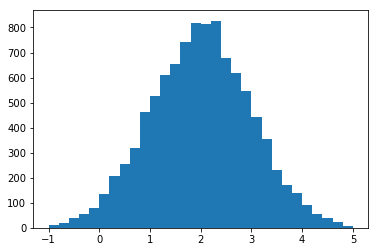

In [48]:
# Calculate the number of entries per bin and the uncertainties of the directly generated random numbers
n_direct = plt.hist(rand_direct, bins=bins_arr)[0]
sigma_direct = n_direct**0.5

In [49]:
# Define the gaussian distr.
def gaussian(x, mu, sigma):
    return 1/(2*np.pi*sigma**2)**0.5 * np.exp(- (x - mu)**2 / (2*sigma**2))

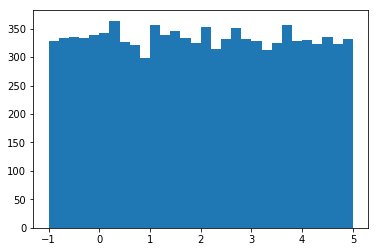

In [50]:
# Calculate the number of entries per bin of the uniform distr.
n_uni = plt.hist(rand_uni, bins=bins_arr)[0]

In [51]:
# Get the weighted numbers and their uncertainties
n_weighted = np.round(n_uni * gaussian(bins_center, mu, sigma))

sigma_weighted = (n_uni)**0.5 * gaussian(bins_center, mu, sigma)

## b)

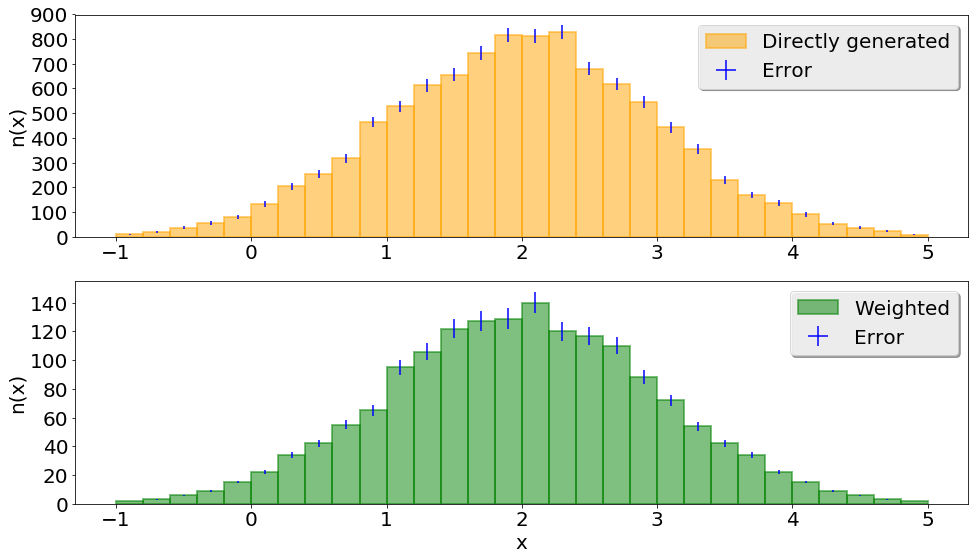

In [52]:
# Plot both histograms with their uncertrainties
plt.figure(figsize=(16,9), dpi=100, facecolor="white")
gs = gridspec.GridSpec(2, 1)

ax = plt.subplot(gs[0,0])
plt.bar(bins_center, n_direct, width=step, color="orange", edgecolor="orange", lw=2, alpha=0.5, label="Directly generated")
plt.errorbar(x=bins_center, y=n_direct, xerr=0, yerr=sigma_direct, ls="", color="blue", label="Error")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("n(x)", fontsize=20)
plt.legend(loc="upper right", fontsize=20, shadow=1)

ax = plt.subplot(gs[1,0])
plt.bar(bins_center, n_weighted, width=step, color="green", edgecolor="green", lw=2, alpha=0.5, label="Weighted")
plt.errorbar(x=bins_center, y=n_weighted, xerr=0, yerr=sigma_weighted, ls="", color="blue", label="Error")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("n(x)", fontsize=20)
plt.legend(loc="upper right", fontsize=20, shadow=1)

## c)

In [53]:
# Calculate the relative uncertainties
epsilon_direct = np.where(n_direct == 0, 0, sigma_direct / n_direct)
epsilon_weighted = np.where(n_weighted == 0, 0, sigma_weighted / n_weighted)

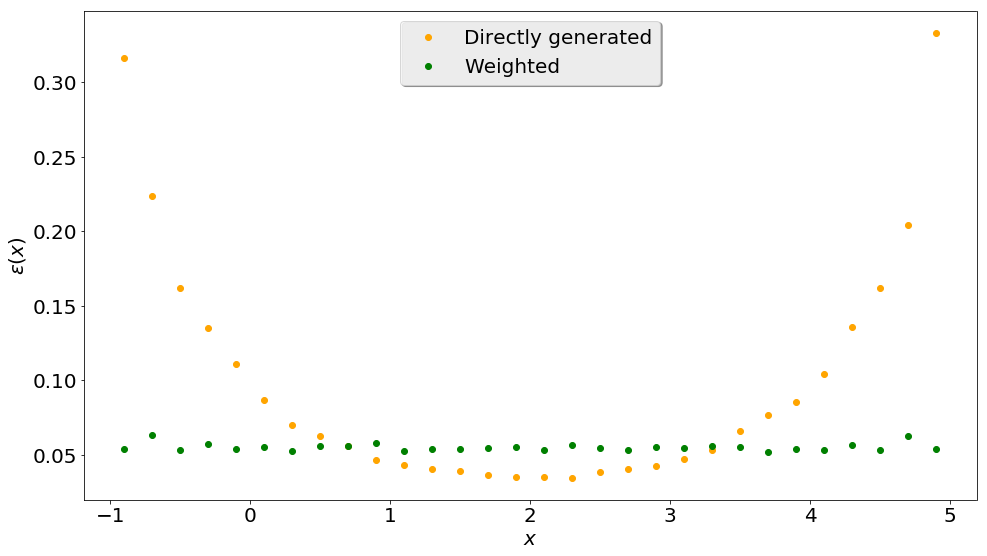

In [54]:
# Plot the relative uncertainties
plt.figure(figsize=(16,9), dpi=100, facecolor="white")
plt.plot(bins_center, epsilon_direct, color="orange", ls="", marker="o", markersize=6, label="Directly generated")
plt.plot(bins_center, epsilon_weighted, color="green", ls="", marker="o", markersize=6, label="Weighted")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$\epsilon(x)$", fontsize=20)
plt.legend(loc="best", fontsize=20, shadow=1)

## d)

Advantages of weighted random numbers:
    - The relative uncertainty does not depend on x, therefore, for x-values
    far from x=mu (tails of the distribution) it is way lower compared to the
    relative uncertainty of the directly generated values 
    
Disadvantages of weighted random numbers:
    - The resulting number of entries per bin is really low due to the
    weighting, so the number of uniformly distributed values (N) has to be
    really high